In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
points = pd.read_csv("pertresults/2023-Jan24_1728_res.csv",
                    names = ["C","rho","meanFy","varx","vary","varFy"])
points["Fysign"] = np.sign(points["meanFy"])

In [23]:
points

,C,rho,meanFy,varx,vary,varFy,Fysign
0,0.730466,-0.259449,-0.089835,0.023233,3.514708,2.112013e-05,-1.0
1,1.131948,0.180398,-0.034241,0.039386,41.756047,2.048648e-06,-1.0
2,1.367505,0.732973,0.000000,0.566722,1519.385786,0.000000e+00,0.0
3,1.462563,0.701786,0.000000,1.243711,1670.572060,0.000000e+00,0.0
4,1.325171,0.790149,0.002593,1.950289,1966.379078,7.629248e-08,1.0
5,1.530261,0.658922,0.000066,8.901935,8916.554586,1.273011e-10,1.0
6,0.761815,-0.109628,-0.145120,0.012014,2.559647,4.820487e-05,-1.0
7,1.114744,0.087020,-0.060591,0.030172,11.916909,9.878876e-06,-1.0
8,1.385116,0.710728,0.000000,1.077959,1010.871466,0.000000e+00,0.0
9,1.359005,0.728792,0.000000,0.778738,835.630981,0.000000e+00,0.0


/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_7683/1926853750.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0,3),1/np.linspace(0,3))


(0.0, 3.0)

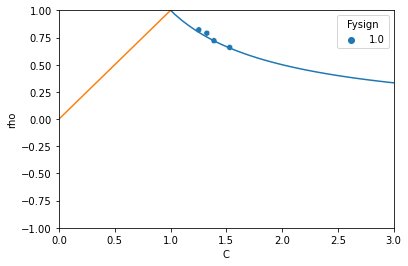

In [29]:
sns.scatterplot(data=points[points["Fysign"]== 1],x="C",y="rho",hue="Fysign")
plt.plot(np.linspace(0,3),1/np.linspace(0,3))
plt.plot(np.linspace(0,3),np.linspace(0,3))
plt.ylim(-1,1)
plt.xlim(0,3)